In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [10]:
type(data)

dict

In [11]:
import pandas as pd

pd.set_option('display.max.columns', None)

df = pd.json_normalize(data['data'])

df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11631   
1    1027      Ethereum    ETH      ethereum              9206   
2     825   Tether USDt   USDT        tether             94066   
3    1839           BNB    BNB           bnb              2207   
4    5426        Solana    SOL        solana               715   
5    3408          USDC   USDC      usd-coin             21485   
6      52           XRP    XRP           xrp              1364   
7   11419       Toncoin    TON       toncoin               502   
8      74      Dogecoin   DOGE      dogecoin              1034   
9    2010       Cardano    ADA       cardano              1221   
10   1958          TRON    TRX          tron              1006   
11   5805     Avalanche   AVAX     avalanche               761   
12   5994     Shiba Inu   SHIB     shiba-inu               855   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14   6636      Polkadot    DOT  polkadot-new               798   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2013-08-04T00:00:00.000Z   
7   2021-08-26T13:40:22.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2020-07-13T00:00:00.000Z   
12  2020-08-01T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2020-08-19T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
5   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
6   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
7   [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
10  [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
11  [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
12      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14  [substrate, polkadot, binance-chain, polkadot-...           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.973964e+07  1.973964e+07            False       NaN         1   
1         1.202748e+08  1.202748e+08             True       NaN         2   
2         1.156386e+11  1.170681e+11             True       NaN         3   
3         1.459364e+08  1.459364e+08            False       NaN         4   
4         4.668417e+08  5.822637e+08             True       NaN         5   
5         3.450983e+10  3.450983e+10            False       NaN         6   
6         5.611308e+10  9.998734e+10            False       NaN         7   
7         2.518566e+09  5.110447e+09             True       NaN         8   
8         1.455252e+11  1.455252e+11             True       NaN         9   
9         3.593454e+10  3.713026e+10            False       NaN        10   
10        8.697592e+10  8.697593e+10             True       NaN        11   
11        3.953360e+08  4.446823e+08            False       NaN        12   
12        5.892704e+14  5.895191e+14            False       NaN        13   
13        1.974664e+07  1.974664e+07            False       NaN        14   
14        1.480808e+09  1.480808e+09             True       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [12]:
#add column at the end

df['timestamp'] = pd.to_datetime('now')

df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11631   
1    1027      Ethereum    ETH      ethereum              9206   
2     825   Tether USDt   USDT        tether             94066   
3    1839           BNB    BNB           bnb              2207   
4    5426        Solana    SOL        solana               715   
5    3408          USDC   USDC      usd-coin             21485   
6      52           XRP    XRP           xrp              1364   
7   11419       Toncoin    TON       toncoin               502   
8      74      Dogecoin   DOGE      dogecoin              1034   
9    2010       Cardano    ADA       cardano              1221   
10   1958          TRON    TRX          tron              1006   
11   5805     Avalanche   AVAX     avalanche               761   
12   5994     Shiba Inu   SHIB     shiba-inu               855   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14   6636      Polkadot    DOT  polkadot-new               798   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2013-08-04T00:00:00.000Z   
7   2021-08-26T13:40:22.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2020-07-13T00:00:00.000Z   
12  2020-08-01T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2020-08-19T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
5   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
6   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
7   [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
10  [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
11  [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
12      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14  [substrate, polkadot, binance-chain, polkadot-...           NaN   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.973964e+07  1.973964e+07            False       NaN         1   
1         1.202748e+08  1.202748e+08             True       NaN         2   
2         1.156386e+11  1.170681e+11             True       NaN         3   
3         1.459364e+08  1.459364e+08            False       NaN         4   
4         4.668417e+08  5.822637e+08             True       NaN         5   
5         3.450983e+10  3.450983e+10            False       NaN         6   
6         5.611308e+10  9.998734e+10            False       NaN         7   
7         2.518566e+09  5.110447e+09             True       NaN         8   
8         1.455252e+11  1.455252e+11             True       NaN         9   
9         3.593454e+10  3.713026e+10            False       NaN        10   
10        8.697592e+10  8.697593e+10             True       NaN        11   
11        3.953360e+08  4.446823e+08            False       NaN        12   
12        5.892704e+14  5.895191e+14            False       NaN        13   
13        1.974664e+07  1.974664e+07            False       NaN        14   
14        1.480808e+09  1.480808e+09             True       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [31]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df], ignore_index=True)

    if not os.path.isfile('/Users/amansingh/Desktop/data_analytics/projects/API.csv'):
        df.to_csv('/Users/amansingh/Desktop/data_analytics/projects/API.csv', header = 'column_names')
    else:
        df.to_csv('/Users/amansingh/Desktop/data_analytics/projects/API.csv', mode = 'a', header = False)
    

# Automate python script

In [32]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 min

exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [34]:
pd.set_option('display.max.rows', None)

In [35]:
df72 = pd.read_csv('/Users/amansingh/Desktop/data_analytics/projects/API.csv')

df72

Unnamed: 0     id          name symbol          slug  num_market_pairs  \
0              0      1       Bitcoin    BTC       bitcoin             11631   
1              1   1027      Ethereum    ETH      ethereum              9206   
2              2    825   Tether USDt   USDT        tether             94066   
3              3   1839           BNB    BNB           bnb              2207   
4              4   5426        Solana    SOL        solana               715   
5              5   3408          USDC   USDC      usd-coin             21485   
6              6     52           XRP    XRP           xrp              1364   
7              7  11419       Toncoin    TON       toncoin               502   
8              8     74      Dogecoin   DOGE      dogecoin              1034   
9              9   2010       Cardano    ADA       cardano              1221   
10            10   1958          TRON    TRX          tron              1006   
11            11   5805     Avalanche   AVAX     avalanche               761   
12            12   5994     Shiba Inu   SHIB     shiba-inu               855   
13            13   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14            14   6636      Polkadot    DOT  polkadot-new               798   
15            15      1       Bitcoin    BTC       bitcoin             11631   
16            16   1027      Ethereum    ETH      ethereum              9206   
17            17    825   Tether USDt   USDT        tether             94066   
18            18   1839           BNB    BNB           bnb              2207   
19            19   5426        Solana    SOL        solana               715   
20            20   3408          USDC   USDC      usd-coin             21485   
21            21     52           XRP    XRP           xrp              1364   
22            22  11419       Toncoin    TON       toncoin               502   
23            23     74      Dogecoin   DOGE      dogecoin              1034   
24            24   2010       Cardano    ADA       cardano              1221   
25            25   1958          TRON    TRX          tron              1006   
26            26   5805     Avalanche   AVAX     avalanche               761   
27            27   5994     Shiba Inu   SHIB     shiba-inu               855   
28            28   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
29            29   6636      Polkadot    DOT  polkadot-new               798   
30            30      1       Bitcoin    BTC       bitcoin             11631   
31            31   1027      Ethereum    ETH      ethereum              9206   
32            32    825   Tether USDt   USDT        tether             94066   
33            33   1839           BNB    BNB           bnb              2207   
34            34   5426        Solana    SOL        solana               715   
35            35   3408          USDC   USDC      usd-coin             21485   
36            36     52           XRP    XRP           xrp              1364   
37            37  11419       Toncoin    TON       toncoin               502   
38            38     74      Dogecoin   DOGE      dogecoin              1034   
39            39   2010       Cardano    ADA       cardano              1221   
40            40   1958          TRON    TRX          tron              1006   
41            41   5805     Avalanche   AVAX     avalanche               761   
42            42   5994     Shiba Inu   SHIB     shiba-inu               855   
43            43   1831  Bitcoin Cash    BCH  bitcoin-cash               909   
44            44   6636      Polkadot    DOT  polkadot-new               798   
45            45      1       Bitcoin    BTC       bitcoin             11631   
46            46   1027      Ethereum    ETH      ethereum              9206   
47            47    825   Tether USDt   USDT        tether             94066   
48            48   1839           BNB    BNB           bnb              2207   
49    

# Transforming Data

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [37]:
df

id          name symbol          slug  num_market_pairs  \
0        1       Bitcoin    BTC       bitcoin             11631   
1     1027      Ethereum    ETH      ethereum              9206   
2      825   Tether USDt   USDT        tether             94066   
3     1839           BNB    BNB           bnb              2207   
4     5426        Solana    SOL        solana               715   
5     3408          USDC   USDC      usd-coin             21485   
6       52           XRP    XRP           xrp              1364   
7    11419       Toncoin    TON       toncoin               502   
8       74      Dogecoin   DOGE      dogecoin              1034   
9     2010       Cardano    ADA       cardano              1221   
10    1958          TRON    TRX          tron              1006   
11    5805     Avalanche   AVAX     avalanche               761   
12    5994     Shiba Inu   SHIB     shiba-inu               855   
13    1831  Bitcoin Cash    BCH  bitcoin-cash               909   
14    6636      Polkadot    DOT  polkadot-new               798   
15       1       Bitcoin    BTC       bitcoin             11631   
16    1027      Ethereum    ETH      ethereum              9206   
17     825   Tether USDt   USDT        tether             94066   
18    1839           BNB    BNB           bnb              2207   
19    5426        Solana    SOL        solana               715   
20    3408          USDC   USDC      usd-coin             21485   
21      52           XRP    XRP           xrp              1364   
22   11419       Toncoin    TON       toncoin               502   
23      74      Dogecoin   DOGE      dogecoin              1034   
24    2010       Cardano    ADA       cardano              1221   
25    1958          TRON    TRX          tron              1006   
26    5805     Avalanche   AVAX     avalanche               761   
27    5994     Shiba Inu   SHIB     shiba-inu               855   
28    1831  Bitcoin Cash    BCH  bitcoin-cash               909   
29    6636      Polkadot    DOT  polkadot-new               798   
30       1       Bitcoin    BTC       bitcoin             11631   
31    1027      Ethereum    ETH      ethereum              9206   
32     825   Tether USDt   USDT        tether             94066   
33    1839           BNB    BNB           bnb              2207   
34    5426        Solana    SOL        solana               715   
35    3408          USDC   USDC      usd-coin             21485   
36      52           XRP    XRP           xrp              1364   
37   11419       Toncoin    TON       toncoin               502   
38      74      Dogecoin   DOGE      dogecoin              1034   
39    2010       Cardano    ADA       cardano              1221   
40    1958          TRON    TRX          tron              1006   
41    5805     Avalanche   AVAX     avalanche               761   
42    5994     Shiba Inu   SHIB     shiba-inu               855   
43    1831  Bitcoin Cash    BCH  bitcoin-cash               909   
44    6636      Polkadot    DOT  polkadot-new               798   
45       1       Bitcoin    BTC       bitcoin             11631   
46    1027      Ethereum    ETH      ethereum              9206   
47     825   Tether USDt   USDT        tether             94066   
48    1839           BNB    BNB           bnb              2207   
49    5426        Solana    SOL        solana               715   
50    3408          USDC   USDC      usd-coin             21485   
51      52           XRP    XRP           xrp              1364   
52   11419       Toncoin    TON       toncoin               502   
53      74      Dogecoin   DOGE      dogecoin              1034   
54    2010       Cardano    ADA       cardano              1221   
55    1958          TRON    TRX          tron              1006   
56    5805     Avalanche   AVAX     avalanche               761   
57    5994     Shiba Inu   SHIB     shiba-inu               855   
58    1831  Bitcoin Cash    BCH  bitcoin-cash          

In [38]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                           0.02557                       3.28795   
Ethereum                         -0.14175                       2.07434   
Tether USDt                      -0.00617                       0.00820   
BNB                               0.17009                       1.79818   
Solana                           -0.28659                       0.41497   
USDC                             -0.00614                       0.00877   
XRP                               0.07508                       2.44701   
Toncoin                           1.67036                       6.09752   
Dogecoin                         -0.07038                       1.39912   
Cardano                           0.48708                       1.50719   
TRON                              0.01757                       2.77877   
Avalanche                        -0.25278                       2.28767   
Shiba Inu                        -0.11412                       0.96605   
Bitcoin Cash                     -0.38792                       0.27659   
Polkadot                         -0.01230                       0.14613   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           6.88802                      -2.28934   
Ethereum                          7.54308                     -18.54749   
Tether USDt                      -0.01729                      -0.00623   
BNB                               6.10860                      -4.90963   
Solana                           -5.77263                      -4.14938   
USDC                             -0.00212                       0.00737   
XRP                              11.85199                       9.62160   
Toncoin                          14.17914                     -11.82618   
Dogecoin                          6.65358                      -9.70719   
Cardano                           0.94765                     -21.45562   
TRON                              4.07154                      -6.40384   
Avalanche                        -0.53118                     -20.46081   
Shiba Inu                         0.46262                     -23.14250   
Bitcoin Cash                      7.15972                     -10.02379   
Polkadot                         -1.15668                     -30.49958   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           -7.69569                      -7.28096  
Ethereum                         -22.43424                      -9.82794  
Tether USDt                        0.09644                       0.02292  
BNB                              -12.91883                      -9.72568  
Solana                             0.47929                     -10.91562  
USDC                               0.00376                       0.01950  
XRP                               21.53847                      11.89780  
Toncoin                          -17.56457                      -4.10200  
Dogecoin                         -21.67241                     -32.39825  
Cardano                          -17.06927                     -25.81451  
TRON                              11.18194                       3.83549  
Avalanche                        -29.50944                     -38.70108  
Shiba Inu                        -32.67746                     -44.92002  
Bitcoin Cash                     -18.24576                     -23.91097  
Polkadot                         -26.44341                     -35.07631

In [39]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.02557
              quote.USD.percent_change_24h     3.28795
              quote.USD.percent_change_7d      6.88802
              quote.USD.percent_change_30d    -2.28934
              quote.USD.percent_change_60d    -7.69569
              quote.USD.percent_change_90d    -7.28096
Ethereum      quote.USD.percent_change_1h     -0.14175
              quote.USD.percent_change_24h     2.07434
              quote.USD.percent_change_7d      7.54308
              quote.USD.percent_change_30d   -18.54749
              quote.USD.percent_change_60d   -22.43424
              quote.USD.percent_change_90d    -9.82794
Tether USDt   quote.USD.percent_change_1h     -0.00617
              quote.USD.percent_change_24h     0.00820
              quote.USD.percent_change_7d     -0.01729
              quote.USD.percent_change_30d    -0.00623
              quote.USD.percent_change_60d     0.09644
              quote.US

In [40]:
type(df3)

pandas.core.frame.DataFrame

In [41]:
type(df4)

pandas.core.series.Series

In [42]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.02557
             quote.USD.percent_change_24h   3.28795
             quote.USD.percent_change_7d    6.88802
             quote.USD.percent_change_30d  -2.28934
             quote.USD.percent_change_60d  -7.69569
             quote.USD.percent_change_90d  -7.28096
Ethereum     quote.USD.percent_change_1h   -0.14175
             quote.USD.percent_change_24h   2.07434
             quote.USD.percent_change_7d    7.54308
             quote.USD.percent_change_30d -18.54749
             quote.USD.percent_change_60d -22.43424
             quote.USD.percent_change_90d  -9.82794
Tether USDt  quote.USD.percent_change_1h   -0.00617
             quote.USD.percent_change_24h   0.00820
             quote.USD.percent_change_7d   -0.01729
             quote.USD.percent_change_30d  -0.00623
             quote.USD.percent_change_60d   0.09644
             quote.USD.percent_change_90d   0.02292
BNB          quote.USD.percent_change_1h    0.17009
             quote.USD.percent_change_24h   1.79818
             quote.USD.percent_change_7d    6.10860
             quote.USD.percent_change_30d  -4.90963
             quote.USD.percent_change_60d -12.91883
             quote.USD.percent_change_90d  -9.72568
Solana       quote.USD.percent_change_1h   -0.28659
             quote.USD.percent_change_24h   0.41497
             quote.USD.percent_change_7d   -5.77263
             quote.USD.percent_change_30d  -4.14938
             quote.USD.percent_change_60d   0.47929
             quote.USD.percent_change_90d -10.91562
USDC         quote.USD.percent_change_1h   -0.00614
             quote.USD.percent_change_24h   0.00877
             quote.USD.percent_change_7d   -0.00212
             quote.USD.percent_change_30d   0.00737
             quote.USD.percent_change_60d   0.00376
             quote.USD.percent_change_90d   0.01950
XRP          quote.USD.percent_change_1h    0.07508
             quote.USD.percent_change_24h   2.44701
             quote.USD.percent_change_7d   11.85199
             quote.USD.percent_change_30d   9.62160
             quote.USD.percent_change_60d  21.53847
             quote.USD.percent_change_90d  11.89780
Toncoin      quote.USD.percent_change_1h    1.67036
             quote.USD.percent_change_24h   6.09752
             quote.USD.percent_change_7d   14.17914
             quote.USD.percent_change_30d -11.82618
             quote.USD.percent_change_60d -17.56457
             quote.USD.percent_change_90d  -4.10200
Dogecoin     quote.USD.percent_change_1h   -0.07038
             quote.USD.percent_change_24h   1.39912
             quote.USD.percent_change_7d    6.65358
             quote.USD.percent_change_30d  -9.70719
             quote.USD.percent_change_60d -21.67241
             quote.USD.percent_change_90d -32.39825
Cardano      quote.USD.percent_change_1h    0.48708
             quote.USD.percent_change_24h   1.50719
             quote.USD.percent_change_7d    0.94765
             quote.USD.percent_change_30d -21.45562
             quote.USD.percent_change_60d -17.06927
             quote.USD.percent_change_90d -25.81451
TRON         quote.USD.percent_change_1h    0.01757
             quote.USD.percent_change_24h   2.77877
             quote.USD.percent_change_7d    4.07154
             quote.USD.percent_change_30d  -6.40384
             quote.USD.percent_change_60d  11.18194
             quote.USD.percent_change_90d   3.83549
Avalanche    quote.USD.percent_change_1h   -0.25278
             quote.USD.percent_change_24h   2.28767
             quote.USD.percent_change_7d   -0.53118
             quote.USD.percent_change_30d -20.46081
             quote.USD.percent_change_60d -29.50944
             quote.USD.percent_change_90d -38.70108
Shiba Inu    quote.USD.percent_change_1h   -0.11412
             quote.USD.percent_change_24h   0.96605
             quote.USD.percent_change_7d    0.46262
             quote.USD.percent_change_30d

In [48]:
type(df5)

pandas.core.frame.DataFrame

In [49]:
df5.count()

values    90
dtype: int64

In [52]:
index = pd.Index(range(90))

df6 = df5.reset_index()

df6

name                       level_1    values
0        Bitcoin   quote.USD.percent_change_1h   0.02557
1        Bitcoin  quote.USD.percent_change_24h   3.28795
2        Bitcoin   quote.USD.percent_change_7d   6.88802
3        Bitcoin  quote.USD.percent_change_30d  -2.28934
4        Bitcoin  quote.USD.percent_change_60d  -7.69569
5        Bitcoin  quote.USD.percent_change_90d  -7.28096
6       Ethereum   quote.USD.percent_change_1h  -0.14175
7       Ethereum  quote.USD.percent_change_24h   2.07434
8       Ethereum   quote.USD.percent_change_7d   7.54308
9       Ethereum  quote.USD.percent_change_30d -18.54749
10      Ethereum  quote.USD.percent_change_60d -22.43424
11      Ethereum  quote.USD.percent_change_90d  -9.82794
12   Tether USDt   quote.USD.percent_change_1h  -0.00617
13   Tether USDt  quote.USD.percent_change_24h   0.00820
14   Tether USDt   quote.USD.percent_change_7d  -0.01729
15   Tether USDt  quote.USD.percent_change_30d  -0.00623
16   Tether USDt  quote.USD.percent_change_60d   0.09644
17   Tether USDt  quote.USD.percent_change_90d   0.02292
18           BNB   quote.USD.percent_change_1h   0.17009
19           BNB  quote.USD.percent_change_24h   1.79818
20           BNB   quote.USD.percent_change_7d   6.10860
21           BNB  quote.USD.percent_change_30d  -4.90963
22           BNB  quote.USD.percent_change_60d -12.91883
23           BNB  quote.USD.percent_change_90d  -9.72568
24        Solana   quote.USD.percent_change_1h  -0.28659
25        Solana  quote.USD.percent_change_24h   0.41497
26        Solana   quote.USD.percent_change_7d  -5.77263
27        Solana  quote.USD.percent_change_30d  -4.14938
28        Solana  quote.USD.percent_change_60d   0.47929
29        Solana  quote.USD.percent_change_90d -10.91562
30          USDC   quote.USD.percent_change_1h  -0.00614
31          USDC  quote.USD.percent_change_24h   0.00877
32          USDC   quote.USD.percent_change_7d  -0.00212
33          USDC  quote.USD.percent_change_30d   0.00737
34          USDC  quote.USD.percent_change_60d   0.00376
35          USDC  quote.USD.percent_change_90d   0.01950
36           XRP   quote.USD.percent_change_1h   0.07508
37           XRP  quote.USD.percent_change_24h   2.44701
38           XRP   quote.USD.percent_change_7d  11.85199
39           XRP  quote.USD.percent_change_30d   9.62160
40           XRP  quote.USD.percent_change_60d  21.53847
41           XRP  quote.USD.percent_change_90d  11.89780
42       Toncoin   quote.USD.percent_change_1h   1.67036
43       Toncoin  quote.USD.percent_change_24h   6.09752
44       Toncoin   quote.USD.percent_change_7d  14.17914
45       Toncoin  quote.USD.percent_change_30d -11.82618
46       Toncoin  quote.USD.percent_change_60d -17.56457
47       Toncoin  quote.USD.percent_change_90d  -4.10200
48      Dogecoin   quote.USD.percent_change_1h  -0.07038
49      Dogecoin  quote.USD.percent_change_24h   1.39912
50      Dogecoin   quote.USD.percent_change_7d   6.65358
51      Dogecoin  quote.USD.percent_change_30d  -9.70719
52      Dogecoin  quote.USD.percent_change_60d -21.67241
53      Dogecoin  quote.USD.percent_change_90d -32.39825
54       Cardano   quote.USD.percent_change_1h   0.48708
55       Cardano  quote.USD.percent_change_24h   1.50719
56       Cardano   quote.USD.percent_change_7d   0.94765
57       Cardano  quote.USD.percent_change_30d -21.45562
58       Cardano  quote.USD.percent_change_60d -17.06927
59       Cardano  quote.USD.percent_change_90d -25.81451
60          TRON   quote.USD.percent_change_1h   0.01757
61          TRON  quote.USD.percent_change_24h   2.77877
62          TRON   quote.USD.percent_change_7d   4.07154
63          TRON  quote.USD.percent_change_30d  -6.40384
64          TRON  quote.USD.percent_change_60d  11.18194
65          TRON  quote.USD.percent_change_90d   3.83549
66     Avalanche   quote.USD.percent_change_1h  -0.25278
67     Avalanche  quote.USD.percent_change_24h   2.28767
68     Avalanche   quote.USD.percent_change_7d  -0.53118
69     Avalanche  quot

In [54]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

name                percent_change    values
0        Bitcoin   quote.USD.percent_change_1h   0.02557
1        Bitcoin  quote.USD.percent_change_24h   3.28795
2        Bitcoin   quote.USD.percent_change_7d   6.88802
3        Bitcoin  quote.USD.percent_change_30d  -2.28934
4        Bitcoin  quote.USD.percent_change_60d  -7.69569
5        Bitcoin  quote.USD.percent_change_90d  -7.28096
6       Ethereum   quote.USD.percent_change_1h  -0.14175
7       Ethereum  quote.USD.percent_change_24h   2.07434
8       Ethereum   quote.USD.percent_change_7d   7.54308
9       Ethereum  quote.USD.percent_change_30d -18.54749
10      Ethereum  quote.USD.percent_change_60d -22.43424
11      Ethereum  quote.USD.percent_change_90d  -9.82794
12   Tether USDt   quote.USD.percent_change_1h  -0.00617
13   Tether USDt  quote.USD.percent_change_24h   0.00820
14   Tether USDt   quote.USD.percent_change_7d  -0.01729
15   Tether USDt  quote.USD.percent_change_30d  -0.00623
16   Tether USDt  quote.USD.percent_change_60d   0.09644
17   Tether USDt  quote.USD.percent_change_90d   0.02292
18           BNB   quote.USD.percent_change_1h   0.17009
19           BNB  quote.USD.percent_change_24h   1.79818
20           BNB   quote.USD.percent_change_7d   6.10860
21           BNB  quote.USD.percent_change_30d  -4.90963
22           BNB  quote.USD.percent_change_60d -12.91883
23           BNB  quote.USD.percent_change_90d  -9.72568
24        Solana   quote.USD.percent_change_1h  -0.28659
25        Solana  quote.USD.percent_change_24h   0.41497
26        Solana   quote.USD.percent_change_7d  -5.77263
27        Solana  quote.USD.percent_change_30d  -4.14938
28        Solana  quote.USD.percent_change_60d   0.47929
29        Solana  quote.USD.percent_change_90d -10.91562
30          USDC   quote.USD.percent_change_1h  -0.00614
31          USDC  quote.USD.percent_change_24h   0.00877
32          USDC   quote.USD.percent_change_7d  -0.00212
33          USDC  quote.USD.percent_change_30d   0.00737
34          USDC  quote.USD.percent_change_60d   0.00376
35          USDC  quote.USD.percent_change_90d   0.01950
36           XRP   quote.USD.percent_change_1h   0.07508
37           XRP  quote.USD.percent_change_24h   2.44701
38           XRP   quote.USD.percent_change_7d  11.85199
39           XRP  quote.USD.percent_change_30d   9.62160
40           XRP  quote.USD.percent_change_60d  21.53847
41           XRP  quote.USD.percent_change_90d  11.89780
42       Toncoin   quote.USD.percent_change_1h   1.67036
43       Toncoin  quote.USD.percent_change_24h   6.09752
44       Toncoin   quote.USD.percent_change_7d  14.17914
45       Toncoin  quote.USD.percent_change_30d -11.82618
46       Toncoin  quote.USD.percent_change_60d -17.56457
47       Toncoin  quote.USD.percent_change_90d  -4.10200
48      Dogecoin   quote.USD.percent_change_1h  -0.07038
49      Dogecoin  quote.USD.percent_change_24h   1.39912
50      Dogecoin   quote.USD.percent_change_7d   6.65358
51      Dogecoin  quote.USD.percent_change_30d  -9.70719
52      Dogecoin  quote.USD.percent_change_60d -21.67241
53      Dogecoin  quote.USD.percent_change_90d -32.39825
54       Cardano   quote.USD.percent_change_1h   0.48708
55       Cardano  quote.USD.percent_change_24h   1.50719
56       Cardano   quote.USD.percent_change_7d   0.94765
57       Cardano  quote.USD.percent_change_30d -21.45562
58       Cardano  quote.USD.percent_change_60d -17.06927
59       Cardano  quote.USD.percent_change_90d -25.81451
60          TRON   quote.USD.percent_change_1h   0.01757
61          TRON  quote.USD.percent_change_24h   2.77877
62          TRON   quote.USD.percent_change_7d   4.07154
63          TRON  quote.USD.percent_change_30d  -6.40384
64          TRON  quote.USD.percent_change_60d  11.18194
65          TRON  quote.USD.percent_change_90d   3.83549
66     Avalanche   quote.USD.percent_change_1h  -0.25278
67     Avalanche  quote.USD.percent_change_24h   2.28767
68     Avalanche   quote.USD.percent_change_7d  -0.53118
69     Avalanche  quot

In [65]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df7

name percent_change    values
0        Bitcoin             1h   0.02557
1        Bitcoin            24h   3.28795
2        Bitcoin             7d   6.88802
3        Bitcoin            30d  -2.28934
4        Bitcoin            60d  -7.69569
5        Bitcoin            90d  -7.28096
6       Ethereum             1h  -0.14175
7       Ethereum            24h   2.07434
8       Ethereum             7d   7.54308
9       Ethereum            30d -18.54749
10      Ethereum            60d -22.43424
11      Ethereum            90d  -9.82794
12   Tether USDt             1h  -0.00617
13   Tether USDt            24h   0.00820
14   Tether USDt             7d  -0.01729
15   Tether USDt            30d  -0.00623
16   Tether USDt            60d   0.09644
17   Tether USDt            90d   0.02292
18           BNB             1h   0.17009
19           BNB            24h   1.79818
20           BNB             7d   6.10860
21           BNB            30d  -4.90963
22           BNB            60d -12.91883
23           BNB            90d  -9.72568
24        Solana             1h  -0.28659
25        Solana            24h   0.41497
26        Solana             7d  -5.77263
27        Solana            30d  -4.14938
28        Solana            60d   0.47929
29        Solana            90d -10.91562
30          USDC             1h  -0.00614
31          USDC            24h   0.00877
32          USDC             7d  -0.00212
33          USDC            30d   0.00737
34          USDC            60d   0.00376
35          USDC            90d   0.01950
36           XRP             1h   0.07508
37           XRP            24h   2.44701
38           XRP             7d  11.85199
39           XRP            30d   9.62160
40           XRP            60d  21.53847
41           XRP            90d  11.89780
42       Toncoin             1h   1.67036
43       Toncoin            24h   6.09752
44       Toncoin             7d  14.17914
45       Toncoin            30d -11.82618
46       Toncoin            60d -17.56457
47       Toncoin            90d  -4.10200
48      Dogecoin             1h  -0.07038
49      Dogecoin            24h   1.39912
50      Dogecoin             7d   6.65358
51      Dogecoin            30d  -9.70719
52      Dogecoin            60d -21.67241
53      Dogecoin            90d -32.39825
54       Cardano             1h   0.48708
55       Cardano            24h   1.50719
56       Cardano             7d   0.94765
57       Cardano            30d -21.45562
58       Cardano            60d -17.06927
59       Cardano            90d -25.81451
60          TRON             1h   0.01757
61          TRON            24h   2.77877
62          TRON             7d   4.07154
63          TRON            30d  -6.40384
64          TRON            60d  11.18194
65          TRON            90d   3.83549
66     Avalanche             1h  -0.25278
67     Avalanche            24h   2.28767
68     Avalanche             7d  -0.53118
69     Avalanche            30d -20.46081
70     Avalanche            60d -29.50944
71     Avalanche            90d -38.70108
72     Shiba Inu             1h  -0.11412
73     Shiba Inu            24h   0.96605
74     Shiba Inu             7d   0.46262
75     Shiba Inu            30d -23.14250
76     Shiba Inu            60d -32.67746
77     Shiba Inu            90d -44.92002
78  Bitcoin Cash             1h  -0.38792
79  Bitcoin Cash            24h   0.27659
80  Bitcoin Cash             7d   7.15972
81  Bitcoin Cash            30d -10.02379
82  Bitcoin Cash            60d -18.24576
83  Bitcoin Cash            90d -23.91097
84      Polkadot             1h  -0.01230
85      Polkadot            24h   0.14613
86      Polkadot             7d  -1.15668
87      Polkadot            30d -30.49958
88      Polkadot            60d -26.44341
89      Polkadot            90d -35.07631

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

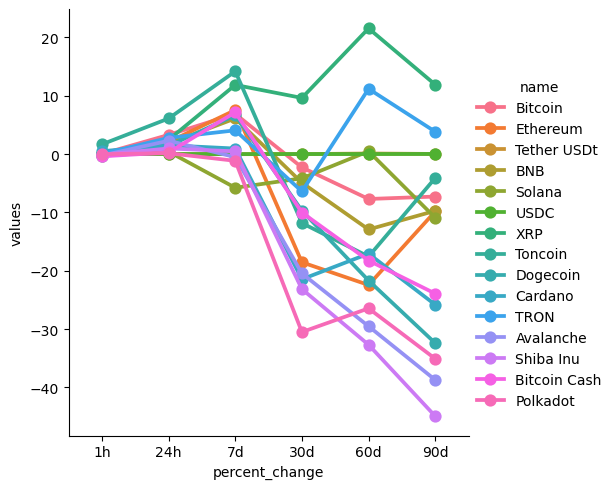

In [67]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [70]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")

df10

name  quote.USD.price                  timestamp
0    Bitcoin      61069.83042 2024-08-13 23:47:11.569341
15   Bitcoin      61135.85271 2024-08-13 23:47:11.569341
30   Bitcoin      61095.57644 2024-08-13 23:47:11.569341
45   Bitcoin      61114.93280 2024-08-13 23:47:11.569341
60   Bitcoin      61112.58982 2024-08-13 23:47:11.569341
75   Bitcoin      61134.68075 2024-08-13 23:47:11.569341
90   Bitcoin      61069.83042 2024-08-13 23:47:11.569341
105  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
120  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
135  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
150  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
165  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
180  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
195  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
210  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
225  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
240  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
255  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
270  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
285  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
300  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
315  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
330  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
345  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
360  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
375  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
390  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
405  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
420  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
435  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
450  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
465  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
480  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
495  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
510  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
525  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
540  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
555  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
570  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
585  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
600  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
615  Bitcoin      61134.68075 2024-08-13 23:47:11.569341
630  Bitcoin      61069.83042 2024-08-13 23:47:11.569341
645  Bitcoin      61135.85271 2024-08-13 23:47:11.569341
660  Bitcoin      61095.57644 2024-08-13 23:47:11.569341
675  Bitcoin      61114.93280 2024-08-13 23:47:11.569341
690  Bitcoin      61112.58982 2024-08-13 23:47:11.569341
705  Bitcoin      61134.68075 2024-08-13 23:47:11.569341

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

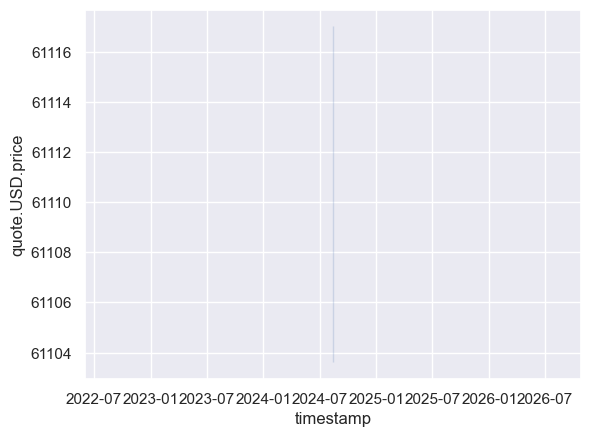

In [72]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df10)